In [1]:
using Statistics
using Plots

In [2]:
#How to form a circle
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
end 

circleShape (generic function with 1 method)

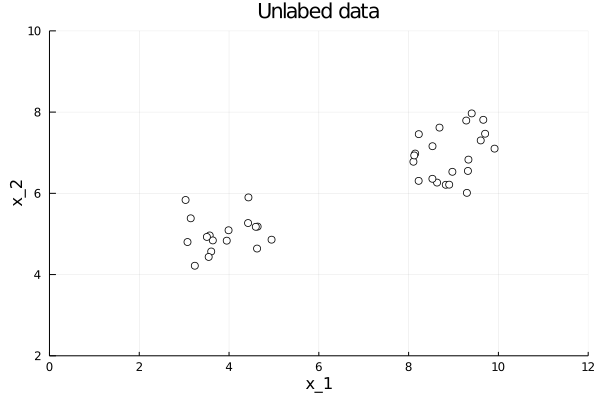

In [3]:
#Assume the center of cluster1 is (4,5) with radius 1.8
cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]
#Assume the center of cluster2 is (9,7) with radius 2.2
cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

#Make the full data set of unlabeled points
data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

#Plot the data
plot(legend = false, 
     xlabel = "x_1",
       xlim = (0,12),
     ylabel = "x_2",
       ylim = (2,10),
      title = "Unlabed data")

scatter!(data,
      color = "white")

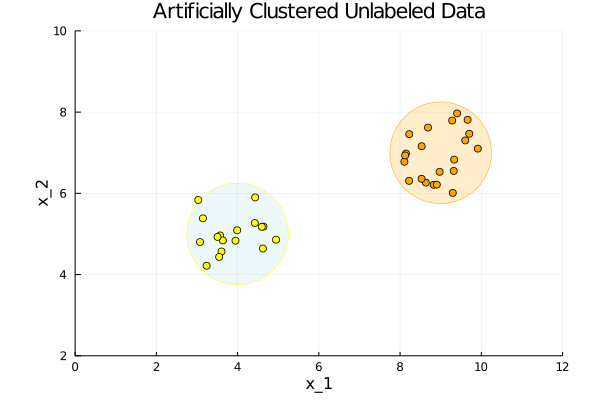

In [4]:
plot(legend = false, 
     xlabel = "x_1",
       xlim = (0,12),
     ylabel = "x_2",
       ylim = (2,10),
      title = "Artificially Clustered Unlabeled Data")

plot!(circleShape(4, 5, 1.25),
    seriestype = [:shape,],
            lw = 0.5,
             c = "lightblue",
     linecolor = "yellow",
        legend = false,
     fillalpha = 0.2,
  aspect_ratio = 1,)

plot!(circleShape(9, 7, 1.25),
    seriestype = [:shape,],
            lw = 0.5,
             c = "orange",
     linecolor = "orange",
        legend = false,
     fillalpha = 0.2,
  aspect_ratio = 1,)

scatter!(cluster1,
     color = "yellow",
    legend = false)

scatter!(cluster2,
     color = "orange",
    legend = false)


In [5]:
#Define the Euclidean distance as a function 
function euclidean_distance(p1, p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i =1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [11]:
function k_means_distances(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end;

In [20]:
function k_means_clusters(X, centroids, k)
    distances = k_means_distances(X, centroids, k)
     clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
            end
        end
    end
    return clusters
end      

k_means_clusters (generic function with 1 method)

In [24]:
function k_mean_new_centroids(X, centroids, k)
       clusters = k_means_clusters(X, centroids,k)
    new_centers = []
    
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
    end
    return new_centers
end

k_mean_new_centroids (generic function with 1 method)

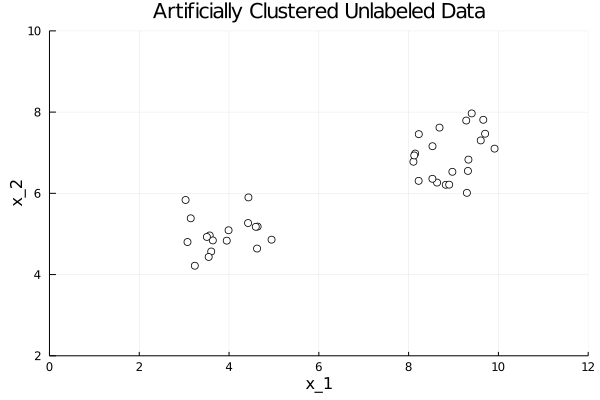

In [14]:
plot(legend = false, 
     xlabel = "x_1",
       xlim = (0,12),
     ylabel = "x_2",
       ylim = (2,10),
      title = "Artificially Clustered Unlabeled Data")

scatter!(cluster1,
      color = "white",
     legend = false)

scatter!(cluster2,
      color = "white",
     legend = false)

[(3, 8), (6, 7)]


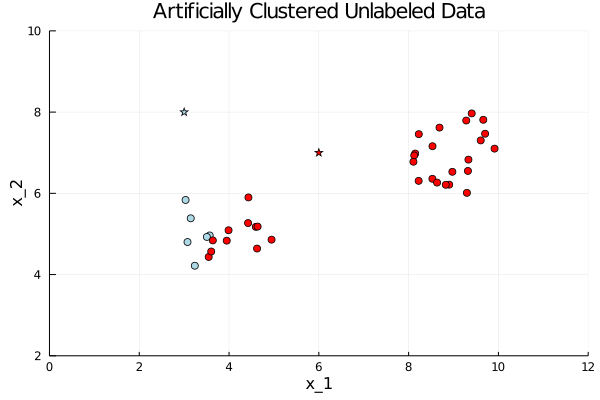

In [18]:
#Test your functions
initial_centroids = [(rand(1:10), rand(1:10)), (rand(1:10), rand(1:10))]
        clusters = k_means_clusters(data, initial_centroids, 2)

plot(legend = false, 
     xlabel = "x_1",
       xlim = (0,12),
     ylabel = "x_2",
       ylim = (2,10),
      title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
      color = "lightblue",
     legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 2],
      color = "red",
     legend = false)

scatter!([initial_centroids[1]],
      color = "lightblue",
      shape = :star5,
     legend = false)

scatter!([initial_centroids[2]],
      color = "red",
      shape = :star5,
     legend = false)

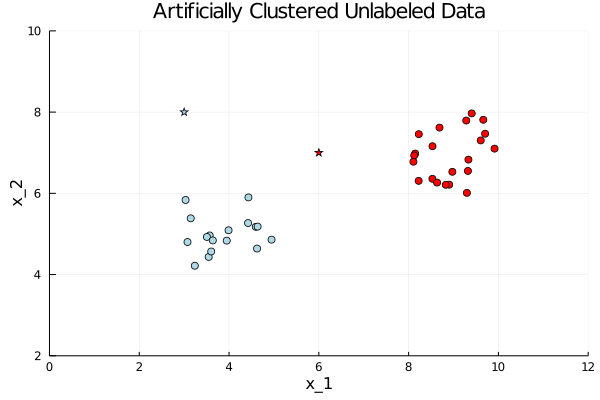

In [25]:
centroids_test = k_mean_new_centroids(data, initial_centroids, 2)
      clusters = k_means_clusters(data, centroids_test, 2)

plot(legend = false, 
     xlabel = "x_1",
       xlim = (0,12),
     ylabel = "x_2",
       ylim = (2,10),
      title = "Artificially Clustered Unlabeled Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1],
      color = "lightblue",
     legend = false)

scatter!([x for x in keys(clusters) if clusters[x] == 2],
      color = "red",
     legend = false)

scatter!([initial_centroids[1]],
      color = "lightblue",
      shape = :star5,
     legend = false)

scatter!([initial_centroids[2]],
      color = "red",
      shape = :star5,
     legend = false)
